# Tesis Parte IV

# Clustering con el Método K-Means


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

%matplotlib inline


# Importamos los datos


In [2]:
#diabetes=pd.read_csv('caracteristicas-diabetes.csv', engine='python')
#diabetes=pd.read_csv('4-train_norm_split.csv', engine='python')

diabetes=pd.read_csv('2-medicamentos-norm-fix.csv', engine='python')


# Vemos las caracteristicas del objeto 'Diabetes'


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Column1                   5177 non-null   int64  
 1   gender                    5177 non-null   int64  
 2   age                       5177 non-null   float64
 3   admission_type_id         5177 non-null   float64
 4   discharge_disposition_id  5177 non-null   float64
 5   admission_source_id       5177 non-null   float64
 6   time_in_hospital          5177 non-null   float64
 7   num_lab_procedures        5177 non-null   float64
 8   num_procedures            5177 non-null   float64
 9   num_medications           5177 non-null   float64
 10  number_outpatient         5177 non-null   float64
 11  number_emergency          5177 non-null   float64
 12  number_inpatient          5177 non-null   float64
 13  number_diagnoses          5177 non-null   float64
 14  max_glu_

In [4]:
diabetes.head()

,Column1,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,Genitourinary,Injury,Musculoskeletal,Neoplasms,Other_1,Respiratory,InsulinDown,InsulinNo,InsulinSteady,InsulinUp
0,0,0,0.625,0.142857,0.000000,0.142857,0.461538,0.544643,0.000000,0.136986,...,0,0,0,1,0,0,0,0,1,0
1,1,1,0.375,0.000000,0.074074,0.285714,0.461538,0.526786,0.000000,0.191781,...,0,0,0,0,0,0,1,0,0,0
2,2,1,0.625,0.000000,0.000000,0.285714,0.384615,0.767857,0.000000,0.232877,...,1,0,0,0,0,0,0,0,1,0
3,3,0,0.750,0.285714,0.074074,0.142857,0.615385,0.008929,0.000000,0.150685,...,0,0,0,0,1,0,0,0,1,0
4,4,0,0.750,0.714286,0.000000,0.000000,0.384615,0.482143,0.166667,0.164384,...,0,0,0,0,0,0,0,1,0,0


# Quitamos la columna "Unnnamed:0 " del analisis de características

In [5]:
#diabetes_variables=diabetes.drop(['admission_type_id'], axis=1)
#diabetes_variables = diabetes

#diabetes_variables=diabetes.drop(['Unnamed: 0'], axis=1)
diabetes_variables=diabetes.drop(['Column1'], axis=1)
s = 5/2

In [6]:
diabetes_variables.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,Genitourinary,Injury,Musculoskeletal,Neoplasms,Other_1,Respiratory,InsulinDown,InsulinNo,InsulinSteady,InsulinUp
0,0,0.625,0.142857,0.000000,0.142857,0.461538,0.544643,0.000000,0.136986,0.0,...,0,0,0,1,0,0,0,0,1,0
1,1,0.375,0.000000,0.074074,0.285714,0.461538,0.526786,0.000000,0.191781,0.0,...,0,0,0,0,0,0,1,0,0,0
2,1,0.625,0.000000,0.000000,0.285714,0.384615,0.767857,0.000000,0.232877,0.0,...,1,0,0,0,0,0,0,0,1,0
3,0,0.750,0.285714,0.074074,0.142857,0.615385,0.008929,0.000000,0.150685,0.0,...,0,0,0,0,1,0,0,0,1,0
4,0,0.750,0.714286,0.000000,0.000000,0.384615,0.482143,0.166667,0.164384,0.0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
diabetes_norm = diabetes_variables

In [8]:

diabetes_norm.describe()


,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,Genitourinary,Injury,Musculoskeletal,Neoplasms,Other_1,Respiratory,InsulinDown,InsulinNo,InsulinSteady,InsulinUp
count,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,...,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000
mean,0.522890,0.655592,0.152957,0.122200,0.235069,0.369266,0.421740,0.228736,0.243726,0.019782,...,0.039791,0.065868,0.060267,0.034962,0.196446,0.156268,0.107978,0.447556,0.332046,0.112420
std,0.499524,0.180586,0.208202,0.209731,0.202814,0.251508,0.167294,0.292223,0.127890,0.066190,...,0.195488,0.248076,0.238003,0.183702,0.397348,0.363144,0.310382,0.497290,0.470993,0.315913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.153846,0.330357,0.000000,0.150685,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.625000,0.000000,0.000000,0.285714,0.307692,0.428571,0.166667,0.219178,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.750000,0.285714,0.185185,0.285714,0.538462,0.535714,0.333333,0.301370,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Aplicando PCA antes de KMeans

cambio de orden

# PCA

In [9]:
from sklearn.decomposition import PCA

#Número de componentes para PCA ej. 10
comp = 8
componentes = int(comp/s)

pca = PCA(n_components= (componentes) )
pca_diabetes = pca.fit_transform(diabetes_norm)

#pca_diabetes = pca.fit(diabetes_norm)

columns = []
print (comp)
#in range(0, 11, 2)
#for n in componentes(len):
for n in range(1, componentes+1, 1):
    columns.append('Componente_'+str(n))                           
    #print(columns[n])
    
### matriz
    
pca_diabetes_df = pd.DataFrame(data = pca_diabetes, columns = columns )
#pca_diabetes_df = pd.DataFrame(data = pca_diabetes, columns = [componentes])                               
                               
#print(columns[])
"""
for element in columns:
    print (element)
"""
#"""

#pca_nombres_diabetes = pd.concat([pca_diabetes_df, diabetes[['KMeans_Clusters']]], axis=1)
pca_nombres_diabetes = pca_diabetes_df 
#pca_nombres_diabetes = pd.concat([pca_diabetes_df, diabetes_norm[['KMeans_Clusters']]], axis=1)
pca_nombres_diabetes
prueba_silhouette = pca_nombres_diabetes

8


# Busqueda de la cantidad óptima de clusters

Calculando qué tan similares son los individuos dentro de los clusters

In [10]:
wcss = []

for i in range (1, 21):
#kmeans_pca = KMeans(n_clusters = i, random_state = 42,max_iter = 300)
    kmeans_pca = KMeans(n_clusters = i, random_state = 42,max_iter = 300)
#   kmeans_pca.fit(diabetes_norm) #Aplico K-means a la base de datos
    kmeans_pca.fit(pca_nombres_diabetes) #Aplico K-means a la base de datos
    wcss.append(kmeans_pca.inertia_)

Graficando los resultados de WCSS para formar el codo de Jambú

In [11]:
"""
plt.figure(figsize=(20,10))
plt.plot(range(1, 21), wcss, marker = 'o', linestyle = '--')
plt.title("Codo de Jambú K-means con PCA Clustering")
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') #WCSS. Es un indicador de qué tan similares son los individuos dentro de los clusters
plt.show()
"""


'\nplt.figure(figsize=(20,10))\nplt.plot(range(1, 21), wcss, marker = \'o\', linestyle = \'--\')\nplt.title("Codo de Jambú K-means con PCA Clustering")\nplt.xlabel(\'Número de Clusters\')\nplt.ylabel(\'WCSS\') #WCSS. Es un indicador de qué tan similares son los individuos dentro de los clusters\nplt.show()\n'

In [12]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 21), wcss, curve="convex", direction="decreasing")
kl.elbow

6

In [13]:

print (kl.elbow)

6


# Aplicando el método k-means a la base de datos.

# Número de clusters

In [14]:


##CASO N CLUSTERS
#clustering = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300) #crea el modelo 
clustering = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 1000000) #crea el modelo 
num_clusters = clustering.n_clusters

clustering.fit(diabetes_norm) #aplica el modelo a la base de datos 


KMeans(max_iter=1000000, n_clusters=6)

# Agregando la clasificación al archivo original 

In [15]:
#diabetes['KMeans_Clusters'] = clustering.labels_ #Los resultados del clustering se guardan en labels_ dentro del modelo de diabetes.
diabetes_norm['KMeans_Clusters'] = clustering.labels_ #Los resultados del clustering se guardan en labels_ dentro del modelo de diabetes.
diabetes_norm.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,Injury,Musculoskeletal,Neoplasms,Other_1,Respiratory,InsulinDown,InsulinNo,InsulinSteady,InsulinUp,KMeans_Clusters
0,0,0.625,0.142857,0.000000,0.142857,0.461538,0.544643,0.000000,0.136986,0.0,...,0,0,1,0,0,0,0,1,0,3
1,1,0.375,0.000000,0.074074,0.285714,0.461538,0.526786,0.000000,0.191781,0.0,...,0,0,0,0,0,1,0,0,0,5
2,1,0.625,0.000000,0.000000,0.285714,0.384615,0.767857,0.000000,0.232877,0.0,...,0,0,0,0,0,0,0,1,0,3
3,0,0.750,0.285714,0.074074,0.142857,0.615385,0.008929,0.000000,0.150685,0.0,...,0,0,0,1,0,0,0,1,0,2
4,0,0.750,0.714286,0.000000,0.000000,0.384615,0.482143,0.166667,0.164384,0.0,...,0,0,0,0,0,0,1,0,0,1


# Visualizando los clusters que se formaron

aplicaremos el analisis de componentes principales para darnos una idea de como se formaron los clusters (PCA)

In [16]:
#pca_nombres_diabetes = pd.concat([pca_diabetes_df, diabetes[['KMeans_Clusters']]], axis=1)
pca_nombres_diabetes = pd.concat([pca_diabetes_df, diabetes_norm[['KMeans_Clusters']]], axis=1)
pca_nombres_diabetes


,Componente_1,Componente_2,Componente_3,KMeans_Clusters
0,0.978889,0.633984,0.370209,3
1,0.059572,-0.277390,0.294986,5
2,0.995328,1.079407,0.229911,3
3,0.658680,-0.302770,-0.569474,2
4,-0.658794,-0.224517,-0.096928,1
...,...,...,...,...
5172,0.178980,-0.507810,-0.076729,5
5173,0.825904,-0.352559,-0.127029,2
5174,0.093131,-0.295010,-0.381032,5
5175,0.163522,0.183812,-0.722212,5


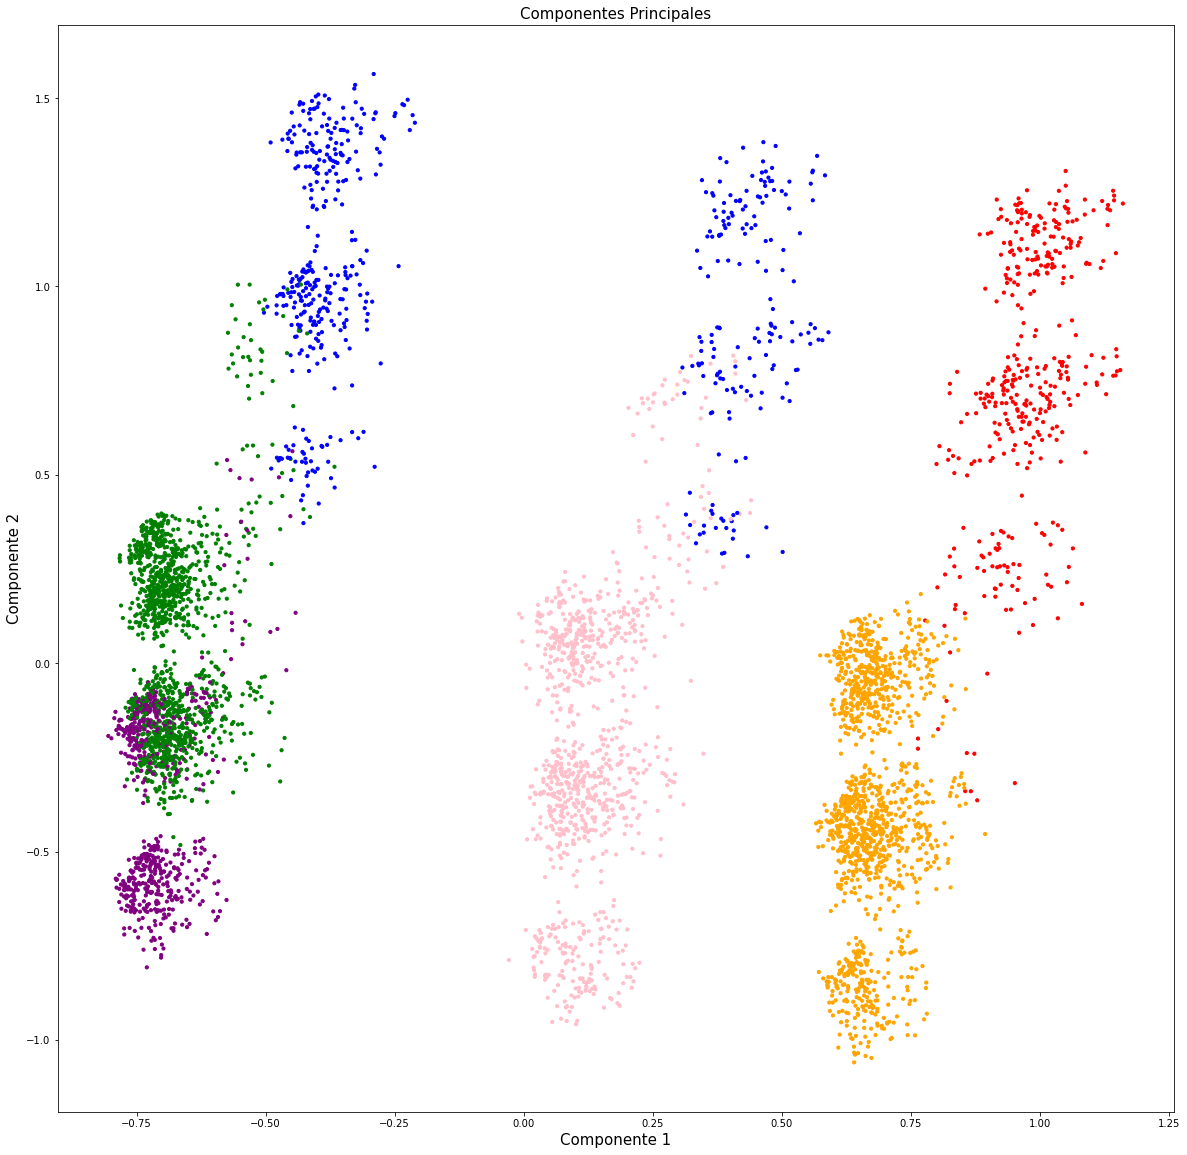

In [17]:
fig = plt.figure(figsize = (20, 20))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize= 15)
ax.set_ylabel('Componente 2', fontsize= 15)
ax.set_title('Componentes Principales', fontsize= 15)

#caso de 3 clusters
#color_theme = np.array(["blue", "green", "orange", "red"])

#caso de 4 clusters
"""
color_theme = np.array(["blue", "green", "orange", "red"])
ax.scatter(x = pca_nombres_diabetes.Componente_1, y = pca_nombres_diabetes.Componente_2,
          c=color_theme[pca_nombres_diabetes.KMeans_Clusters], s = 200)
"""


#caso de hasta 10 clusters colores

color_theme = np.array(["blue", "green", "orange", "red", "purple", "pink","black", "brown" ,"orange", "violet"])
ax.scatter(x = pca_nombres_diabetes.Componente_1, y = pca_nombres_diabetes.Componente_2,
          c=color_theme[pca_nombres_diabetes.KMeans_Clusters], s = 10)

plt.show()

# Grabamos los clusters en el disco duro 

In [18]:
diabetes_norm.to_csv('clusters-diabetes-K6-'+str(comp)+'-K-'+str(num_clusters)+'.csv')
#diabetes.to_csv('Diabetes-con-K-Means-PCA-'+str(pca.n_components)+'-K-'+str(num_clusters)+'.csv')

In [19]:
import sklearn.metrics as metrics
import sklearn.cluster as cluster

#definir variables sample_size
size = 1000

In [20]:
# Calculate Silhoutte Score
#
score = (metrics.silhouette_score(pca_nombres_diabetes, clustering.labels_, metric='euclidean'))
#
# Print the score
#
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.653


In [21]:
print("Valor de PCA = "+str(comp))
#print("Valor de elbow recomendado = "+str(kl.elbow))
print("Número de clusters = "+str(num_clusters))
print("sample size = NONE")
#print("sample size = "+str(1000))

Valor de PCA = 8
Número de clusters = 6
sample size = NONE


In [22]:
# Calculate Silhoutte Score
#
score = (metrics.silhouette_score(pca_nombres_diabetes, clustering.labels_, metric='euclidean', sample_size=size))
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.652


In [23]:
#X_train = pca.fit_transform(diabetes)
#X_train = pca.fit_transform(data)

#X_train = diabetes

X_train = pca_nombres_diabetes

In [24]:
#definir variables sample_size

#fin programa
fin

NameError: name 'fin' is not defined

In [ ]:

for i in range(2,11):
    #labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X_train).labels_  data #,random_state=200
    labels=cluster.KMeans(n_clusters=i,init="k-means++").fit(X_train).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is %0.3f" % (metrics.silhouette_score(X_train,labels,metric="euclidean",sample_size=size)))
    
    #print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_scaled, labels))

    #print("Silhouette Coefficient for k(clusters) = "+str(i)+" is %0.3f" % metrics.silhouette_score(X_train, labels))

In [ ]:
print("Valor de PCA = "+str(pca.n_components))
print("Valor de elbow recomendado = "+str(kl.elbow))
print("Número de clusters = "+str(num_clusters))
print("sample size = "+str(size))

In [ ]:
#definir variables

for i in range(2,11):
    #labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X_train).labels_  data #,random_state=200
    labels=cluster.KMeans(n_clusters=i,init="k-means++").fit(prueba_silhouette).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is %0.3f" % (metrics.silhouette_score(prueba_silhouette,labels,metric="euclidean",sample_size=size)))
    
    #print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_scaled, labels))

    #print("Silhouette Coefficient for k(clusters) = "+str(i)+" is %0.3f" % metrics.silhouette_score(X_train, labels))

In [ ]:
print("Valor de PCA = "+str(pca.n_components))
print("Valor de elbow recomendado = "+str(kl.elbow))
print("Número de clusters = "+str(num_clusters))
print("sample size = "+str(size))

In [ ]:
# Calculate Silhoutte Score
#
score = (metrics.silhouette_score(pca_nombres_diabetes, clustering.labels_, metric='euclidean'))
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

In [ ]:
"""

from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(20,20))
for i in range (2, num_clusters):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(pca_nombres_diabetes)
    #visualizer.fit(X)
"""

"""
for element in columns:
    print (element)


print (columns)
"""